<a href="https://colab.research.google.com/github/SNEHAMICHAEL/Intro-to-Cyber-Security/blob/main/Symmetric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cryptograpghy**

The art and science of keeping messages secure is cryptography.
The art and science of breaking of ciphertext is Cryptanalysis.



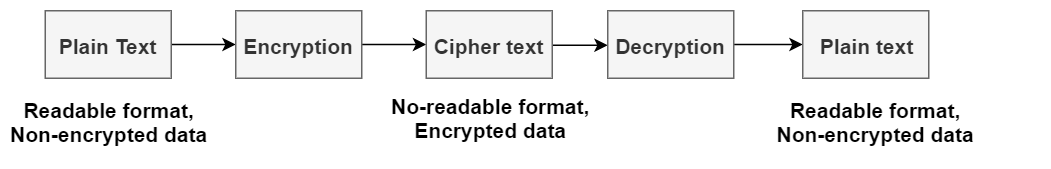

There are two general key-based algorithms:


*   Symmetric Algorithm
*   Asymmetric Algorithm







# **Symmetric Algorithm**

Symmetric Algorithm are where encryption key can be calculated from decryption key and vice-versa.
A Symmetric encryption scheme has five ingredients:

*   Plain text: the original message
*   Encryption algorithm: performs various substitutions and transformations on the plain text
*  Secret key: input to the encryption algorithm, Independent of plain text and  algorithm
*   Ciphertext: this is the scrambled message produced as output
*   Decryption algorithm: encryption algorithm runs in reverse. It takes the ciphertext and the secret key and produces the original plaintext Simplified Model of conventional encryption
*  sender and recipient share a common key
*   all classical encryption algorithms are symmetric
*   Mathematically:

    *   Y = EK(X)     or     Y = E(K, X)

    *   X = DK(Y)     or     X = D(K, Y)

    *   X = plaintext

    *   Y = ciphertext
    *   K = secret key

    *   E = encryption algorithm

    *   D = decryption algorithm
    
  
  Both E and D are known to public  

Two requirements for secure use of symmetric encryption:
*  a strong encryption algorithm
*  a secret key known only to sender / receiver


# 1.   **Caesar Cipher:**


–	earliest known substitution cipher

*  where letters of plaintext are replaced by other letters or by numbers or symbols

*   or if plaintext is viewed as a sequence of bits, then substitution involves replacing plaintext bit patterns with ciphertext bit patterns


–	Invented by Julius Caesar

–	Each letter is replaced by the letter three positions further down the alphabet.

–	Mathematically, map letters to numbers:

a, b, c, ..., x,  y,  z

0, 1, 2, ..., 23, 24, 25

–	Then the general Caesar cipher is:

    c = EK(p) = (p + k) mod 26

    p = DK(c) = (c – k) mod 26

–	For each Alphabet we have 25 possibilities  of replacement.  

–	Key space:  {0, 1, ..., 25}  


In [ ]:
#Python program to perform encryption and decryption using the Caesar cipher.

def encryption(pt, k):
    encrypted_msg = ''
    for char in pt:
        if char.isalpha():
            if char.islower():
                encrypted_msg += chr((ord(char) - 97 + k) % 26 + 97)
            else:
                encrypted_msg += chr((ord(char) - 65 + k) % 26 + 65)
        else:
            encrypted_msg =encrypted_msg + char
    return encrypted_msg

def decryption(ct, k):
    decrypted_msg = ''
    for char in ct:
        if char.isalpha():
            if char.islower():
                decrypted_msg += chr((ord(char) - 97 - k) % 26 + 97)
            else:
                decrypted_msg += chr((ord(char) - 65 - k) % 26 + 65)
        else:
            decrypted_msg =decrypted_msg + char
    return decrypted_msg

plain_text = "APPLE"
print("plain text is",plain_text)
k = 3
c = encryption(plain_text, k)
print("Encrypted text is",c)
d = decryption(c, k)
print("Decrypted text is",d)


plain text is APPLE
Encrypted text is DSSOH
Decrypted text is APPLE



# 2.   **DATA ENCRYPTION STANDARD (DES)**

*   most widely used block cipher in world
*   Data are encrypted in 64-bit blocks using a 56-bit key

*   The same algorithm is used for decryption
*   used 64-bit data blocks with 128-bit key




DES Encryption Overview

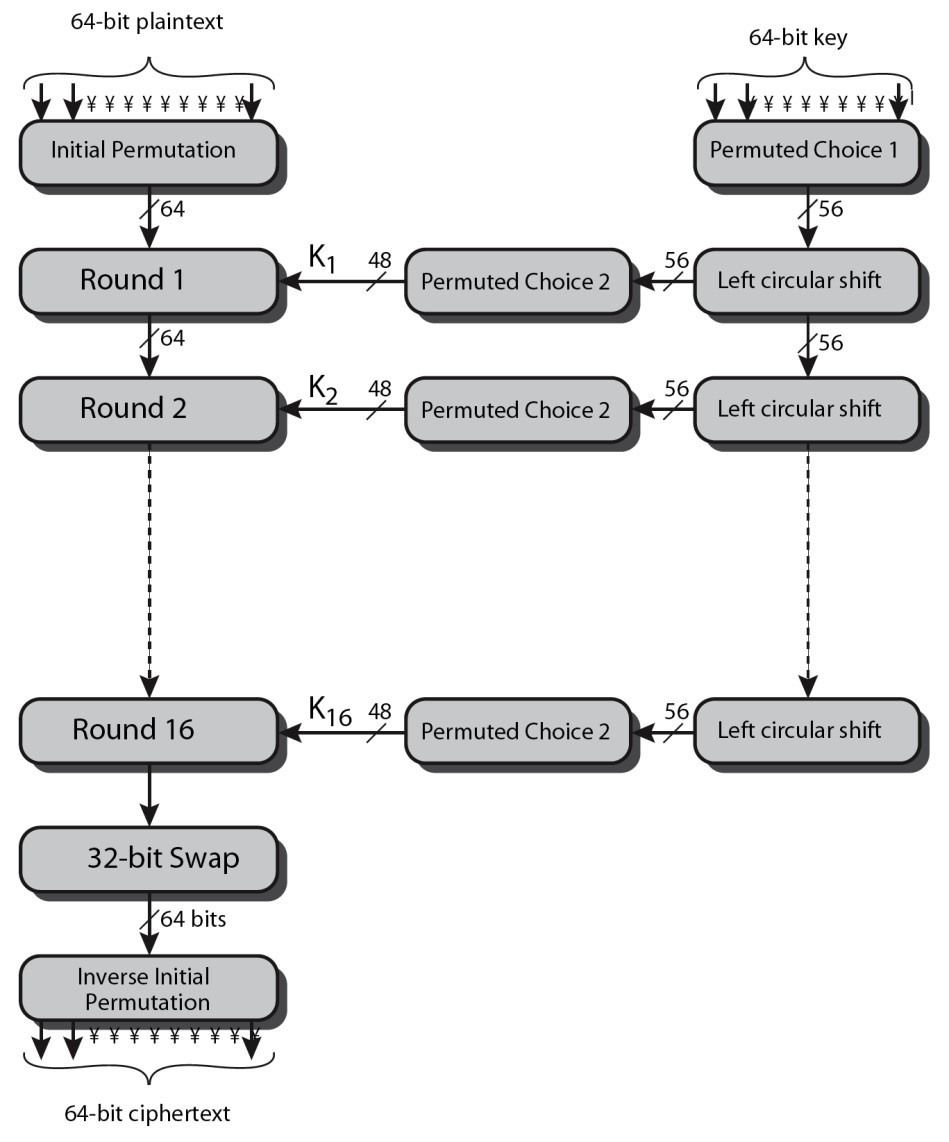
	 	  
The algorithm process breaks down into the following steps:


*   The process begins with the 64-bit plain text block getting handed over to an initial permutation (IP) function.
*   The initial permutation (IP) is then performed on the plain text.
*  Next, the initial permutation (IP) creates two halves of the permuted block, referred to as Left Plain Text (LPT) and Right Plain Text (RPT).
*   Each LPT and RPT goes through 16 rounds of the encryption process.
*  Finally, the LPT and RPT are rejoined, and a Final Permutation (FP) is performed on the newly combined block.
*   The result of this process produces the desired 64-bit ciphertext.
*   The encryption process step (step 4, above) is further broken down into five stages:
            *   Key transformation item
            *   Expansion permutation
            *   S-Box permutation
            *   P-Box permutation
            *   XOR and swap

For decryption, we use the same algorithm, and we reverse the order of the 16 round keys.

In [ ]:
from Crypto.Cipher import DES
from secrets import token_bytes

key = token_bytes(8)

def encrypt(msg):
    cipher = DES.new(key, DES.MODE_EAX)
    nonce = cipher.nonce
    ciphertext, tag = cipher.encrypt_and_digest(msg.encode('ascii'))
    return nonce, ciphertext, tag

def decrypt(nonce, ciphertext, tag):
    cipher = DES.new(key, DES.MODE_EAX, nonce=nonce)
    plaintext = cipher.decrypt(ciphertext)

    try:
        cipher.verify(tag)
        return plaintext.decode('ascii')
    except ValueError:
        return False

msg = input('Enter a message:')
nonce, ciphertext, tag = encrypt(msg)
plaintext = decrypt(nonce, ciphertext, tag)

print(f'Cipher text: {ciphertext}')

if not plaintext:
    print('Message is corrupted!')
else:
    print(f'Plain text: {plaintext}')


Enter a message:nice to meet you
Cipher text: b'K\x96\xf6.\x93#\x84y\x1e\xd3\xaf\x0f\xb5\xd7\x12\xea'
Plain text: nice to meet you
